# Lead Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

**The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**


### Goals of the Case Study
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Steps Involved to achieve the goal:
- Data Reading and Understanding
- Data Cleaning and Analysis
- Model Building
- Model Evaluation & Prediction
- Optimization and Accuracy Score
- Conclusion

In [1]:
### Import of Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import statsmodels 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

pd.set_option('display.max_columns',False)

## Step 1 : Data Reading and Understading

In [2]:
## Reading the data
Lead_Data = pd.read_csv('Leads.csv')
Lead_Data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Reading data dictionary and formatting it to make it more readable
Dict = pd.read_excel('Leads Data Dictionary.xlsx', skiprows=2)
Dict.drop('Unnamed: 0', inplace=True , axis=1)
Dict

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identif...
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,The origin identifier with which the customer ...
3,Lead Source,"The source of the lead. Includes Google, Organ..."
4,Do Not Email,An indicator variable selected by the customer...
5,Do Not Call,An indicator variable selected by the customer...
6,Converted,The target variable. Indicates whether a lead ...
7,TotalVisits,The total number of visits made by the custome...
8,Total Time Spent on Website,The total time spent by the customer on the we...
9,Page Views Per Visit,Average number of pages on the website viewed ...


In [4]:
Lead_Data.shape

(9240, 37)

In [5]:
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# checking percentage of missing values
round(100*(Lead_Data.isnull().sum()/len(Lead_Data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
Lead_Data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Checking the unique values
Lead_Data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
Lead_Data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### Observations so far
- From above reading , we can say that we have total 37 columns and 9240 rows but looking at the overall rows in different columns are lot of missing values that needs to be treated
- We can also observe that the multiple unique values in different columns and looking at our target variable `CONVERTED` we see it has 2 unique value as expected
- We can also see there are multple columns with huge amount of missing rows hence we need to go ahead and take care of it
- We see that there are some columns having just one value that is NO hence we dont need that columns as no one has opted for it irrespective of any Lead Profile  - Magazine , Receive more updates about our course , update me on supply chain, get updates on DM content and I agree to pay the amont through cheque, hence it would be okay to drop them
- We can also see columns with Yes and NO which we can map with 1 and 0 similar to the Converted column - Do Not Email , Do Not Call , Search , Newspaper Article, X Education Forums,Newspaper,Digital Advertisement, Through Recommendations, A free copy of Mastering The Interview
- We can also see some columns are having Select as value which can be converted to new category 'Not Provided' instead of making it as NaN

## Step 2: Data Cleaning and Analysis

In [10]:
# Dropping the columns having only one unique value as it would not impact the analysis
Lead_Data.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'], axis=1 , inplace=True)

In [11]:
Lead_Data.shape

(9240, 32)

In [12]:
# replacing select with not provided as select is no option in the categorical field
Lead_Data = Lead_Data.replace('Select',np.nan)
Lead_Data = Lead_Data.replace(to_replace='unknown', value='Not Provided')

In [13]:
Lead_Data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [14]:
List1=['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Converted','TotalVisits','Last Activity','Country',
       'Specialization', 'How did you hear about X Education','What is your current occupation', 'Search','Tags','City',
       'What matters most to you in choosing a course','Newspaper Article', 'X Education Forums','Newspaper',
       'Digital Advertisement', 'Through Recommendations','Lead Quality',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score',
       'A free copy of Mastering The Interview','Last Notable Activity']

for l1 in List1:
    print(Lead_Data[l1].value_counts())

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       7

In [15]:
# Calculating the null missing count again
round(100*(Lead_Data.isnull().sum()/len(Lead_Data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [16]:
# Dropping columns having more than 35% missing values 
Lead_Data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Quality','Tags'],axis=1,inplace=True)

In [17]:
# Dropping columns that would not be in use for analysis , dropping Id and number as it is unique and 
# would not be useful, dropping lead profile as more than 50% of the data is not provided 
# and same with How did you hear about X Education
Lead_Data.drop(['Prospect ID','Lead Number','Lead Profile','How did you hear about X Education','City','TotalVisits','Page Views Per Visit'],axis=1,inplace=True)

In [18]:
# dropping 'What matters most to you in choosing a course' as well cause we can see 99.99% the reason is 
# better career prospects hence would not impact the analysis
Lead_Data.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [19]:
# Rechecking missing values
round(100*(Lead_Data.isnull().sum()/len(Lead_Data.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [20]:
Lead_Data.shape

(9240, 18)

In [21]:
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9240 non-null   object
 1   Lead Source                             9204 non-null   object
 2   Do Not Email                            9240 non-null   object
 3   Do Not Call                             9240 non-null   object
 4   Converted                               9240 non-null   int64 
 5   Total Time Spent on Website             9240 non-null   int64 
 6   Last Activity                           9137 non-null   object
 7   Country                                 6779 non-null   object
 8   Specialization                          5860 non-null   object
 9   What is your current occupation         6550 non-null   object
 10  Search                                  9240 non-null   object
 11  News

In [22]:
Lead_Data.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Not Provided               5
Canada                     4
Nigeria                    4
Kuwait                     4
Germany                    4
South Africa               4
Sweden                     3
Netherlands                2
Philippines                2
China                      2
Bangladesh                 2
Italy                      2
Uganda                     2
Asia/Pacific Region        2
Ghana                      2
Belgium                    2
Sri Lanka                  1
Malaysia                   1
Kenya                      1
Russia                     1
Switzerland                1
Tanzania                   1
Denmark       

In [23]:
# Replacing Not provided with India 
Lead_Data.Country = Lead_Data.Country.replace(to_replace='Not Provided', value='India')

In [24]:
Lead_Data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
Lead_Data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [26]:
Lead_Data['Country'].isna().value_counts()

False    6779
True     2461
Name: Country, dtype: int64

In [27]:
Lead_Data['Specialization'].isna().value_counts()

False    5860
True     3380
Name: Specialization, dtype: int64

In [28]:
Lead_Data['What is your current occupation'].isna().value_counts()

False    6550
True     2690
Name: What is your current occupation, dtype: int64

In [29]:
# Lets fill Na with Not provided in above three columns
Lead_Data['Country'] = Lead_Data['Country'].fillna('Not Provided')
Lead_Data['Specialization'] = Lead_Data['Specialization'].fillna('Not Provided')
Lead_Data['What is your current occupation'] = Lead_Data['What is your current occupation'].fillna('Not Provided')

In [30]:
def categories(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Provided":
        category = "Not Provided"
    else:
        category = "Foreign Country"
    return category

Lead_Data['Country'] = Lead_Data.apply(lambda x:categories(x['Country']), axis = 1)
Lead_Data['Country'].value_counts()

India              6497
Not Provided       2461
Foreign Country     282
Name: Country, dtype: int64

In [31]:
# Rechecking missing values
round(100*(Lead_Data.isnull().sum()/len(Lead_Data.index)), 2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### Observations so far:
- Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null hence we changed it to new categorical variable Not provided
- This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. Hence we drropped them
- We also dropped the columns having missing values more than 35%
- We also handled Country column as we observed that the majority values were either India or Not provided
- Finally after handling all columns we have 0% missing values and total of 15 columns left to analyze

In [32]:
Lead_Data.shape

(9240, 18)

In [33]:
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9240 non-null   object
 1   Lead Source                             9204 non-null   object
 2   Do Not Email                            9240 non-null   object
 3   Do Not Call                             9240 non-null   object
 4   Converted                               9240 non-null   int64 
 5   Total Time Spent on Website             9240 non-null   int64 
 6   Last Activity                           9137 non-null   object
 7   Country                                 9240 non-null   object
 8   Specialization                          9240 non-null   object
 9   What is your current occupation         9240 non-null   object
 10  Search                                  9240 non-null   object
 11  News

In [34]:
Lead_Data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0,Page Visited on Website,Not Provided,Not Provided,Unemployed,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,674,Email Opened,India,Not Provided,Unemployed,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,1532,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,305,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,1428,Converted to Lead,India,Not Provided,Unemployed,No,No,No,No,No,No,No,Modified


In [35]:
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9240 non-null   object
 1   Lead Source                             9204 non-null   object
 2   Do Not Email                            9240 non-null   object
 3   Do Not Call                             9240 non-null   object
 4   Converted                               9240 non-null   int64 
 5   Total Time Spent on Website             9240 non-null   int64 
 6   Last Activity                           9137 non-null   object
 7   Country                                 9240 non-null   object
 8   Specialization                          9240 non-null   object
 9   What is your current occupation         9240 non-null   object
 10  Search                                  9240 non-null   object
 11  News

In [36]:
#Dropping rows with null values
Lead_Data = Lead_Data[~(Lead_Data['Lead Source'].isnull())]

In [37]:
#Dropping rows with null values
Lead_Data = Lead_Data[~(Lead_Data['Last Activity'].isnull())]

In [38]:
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9103 non-null   object
 1   Lead Source                             9103 non-null   object
 2   Do Not Email                            9103 non-null   object
 3   Do Not Call                             9103 non-null   object
 4   Converted                               9103 non-null   int64 
 5   Total Time Spent on Website             9103 non-null   int64 
 6   Last Activity                           9103 non-null   object
 7   Country                                 9103 non-null   object
 8   Specialization                          9103 non-null   object
 9   What is your current occupation         9103 non-null   object
 10  Search                                  9103 non-null   object
 11  News

In [39]:
#Checking percentage of null values
round(100*(Lead_Data.isnull().sum()/len(Lead_Data.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
Total Time Spent on Website               0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [40]:
#Lets convert the Yes and No to 0 and 1
def mapbinary(x):
    return x.map({'No': 0 , 'Yes':1})
    
Bi_List=['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
         'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

Lead_Data[Bi_List] = Lead_Data[Bi_List].apply(mapbinary)


In [41]:
Lead_Data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0,Page Visited on Website,Not Provided,Not Provided,Unemployed,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,674,Email Opened,India,Not Provided,Unemployed,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,1532,Email Opened,India,Business Administration,Student,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,305,Unreachable,India,Media and Advertising,Unemployed,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,1428,Converted to Lead,India,Not Provided,Unemployed,0,0,0,0,0,0,0,Modified


#### Before creating dummies and starting the model building, lets perform the data analysis

### Data Analysis

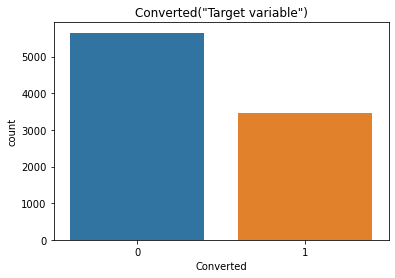

In [42]:
#Univariate Analysis
sns.countplot(Lead_Data['Converted'])
plt.title('Converted("Target variable")')
plt.show()

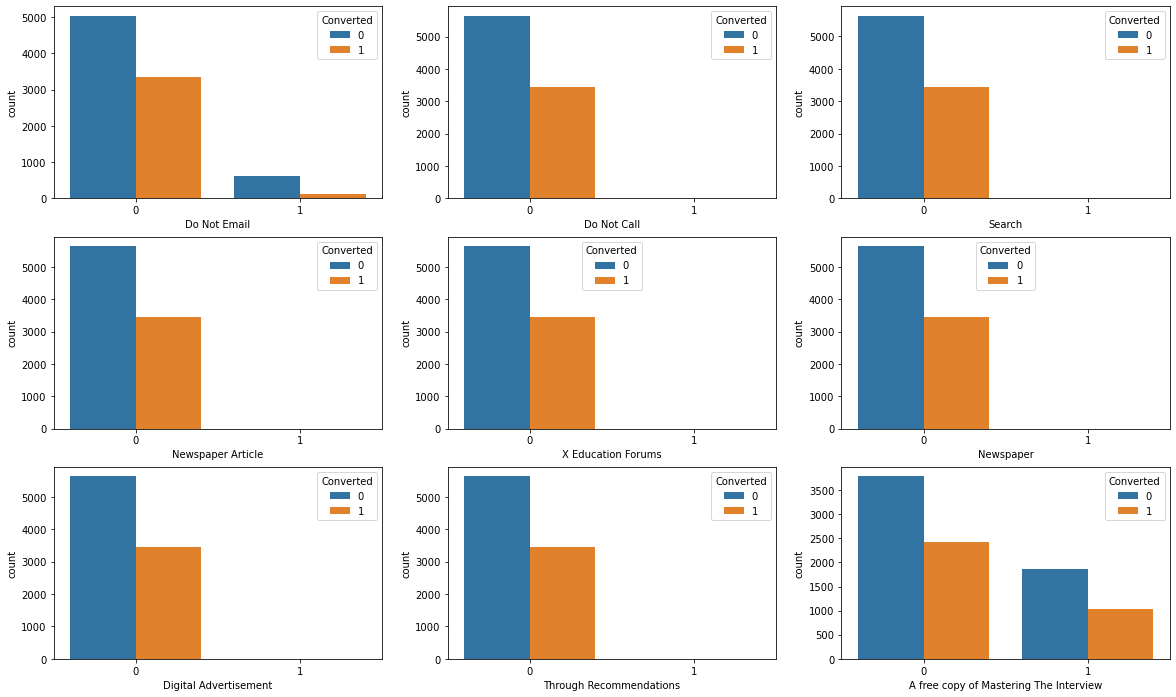

In [43]:
#Bivariate Analysis
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = Lead_Data)
plt.subplot(3,3,2)
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = Lead_Data)
plt.subplot(3,3,3)
sns.countplot(x = 'Search', hue = 'Converted', data = Lead_Data)
plt.subplot(3,3,4)
sns.countplot(x = 'Newspaper Article', hue = 'Converted', data = Lead_Data)
plt.subplot(3,3,5)
sns.countplot(x = 'X Education Forums', hue = 'Converted', data = Lead_Data)
plt.subplot(3,3,6)
sns.countplot(x = 'Newspaper', hue = 'Converted', data = Lead_Data)
plt.subplot(3,3,7)
sns.countplot(x = 'Digital Advertisement', hue = 'Converted', data = Lead_Data)
plt.subplot(3,3,8)
sns.countplot(x = 'Through Recommendations', hue = 'Converted', data = Lead_Data)
plt.subplot(3,3,9)
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = Lead_Data)
plt.show()

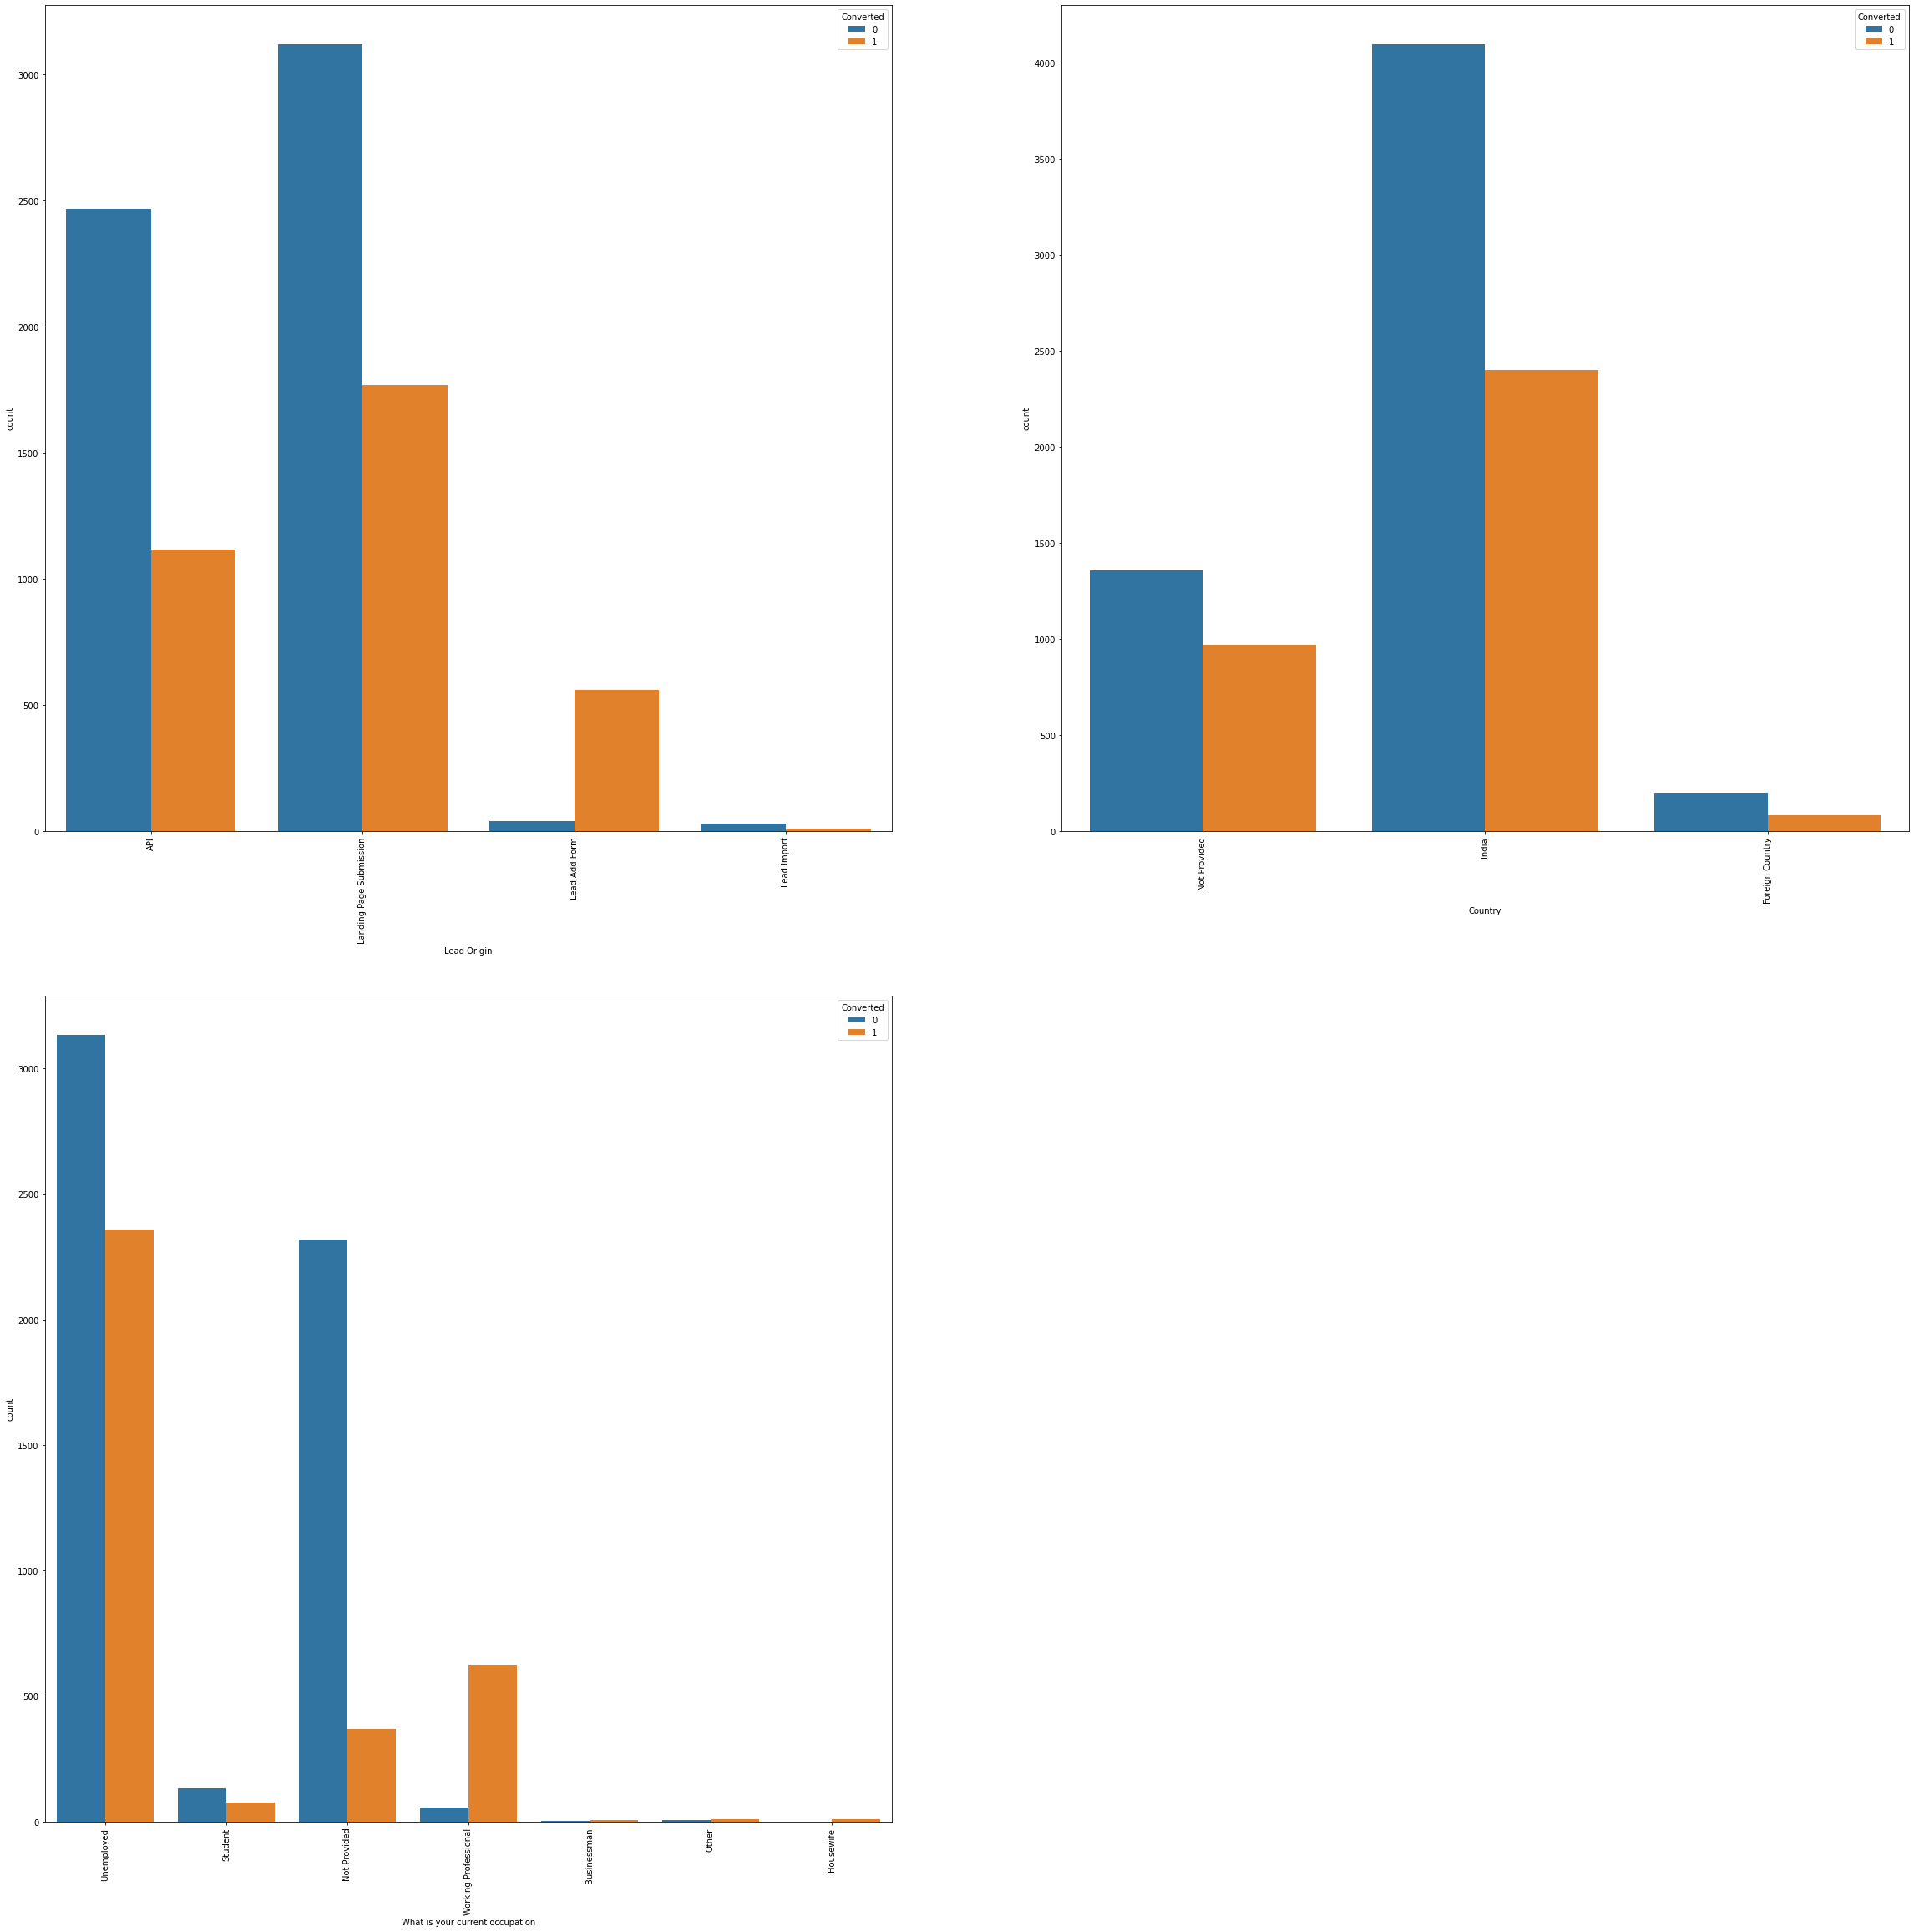

In [44]:
#Bivariate Analysis
plt.figure(figsize=(40, 40))
plt.subplot(2,2,1)
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = Lead_Data).tick_params(axis='x', rotation = 90)
plt.subplot(2,2,2)
sns.countplot(x = 'Country', hue = 'Converted', data = Lead_Data).tick_params(axis='x', rotation = 90)
plt.subplot(2,2,3)
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = Lead_Data).tick_params(axis='x', rotation = 90)

plt.show()

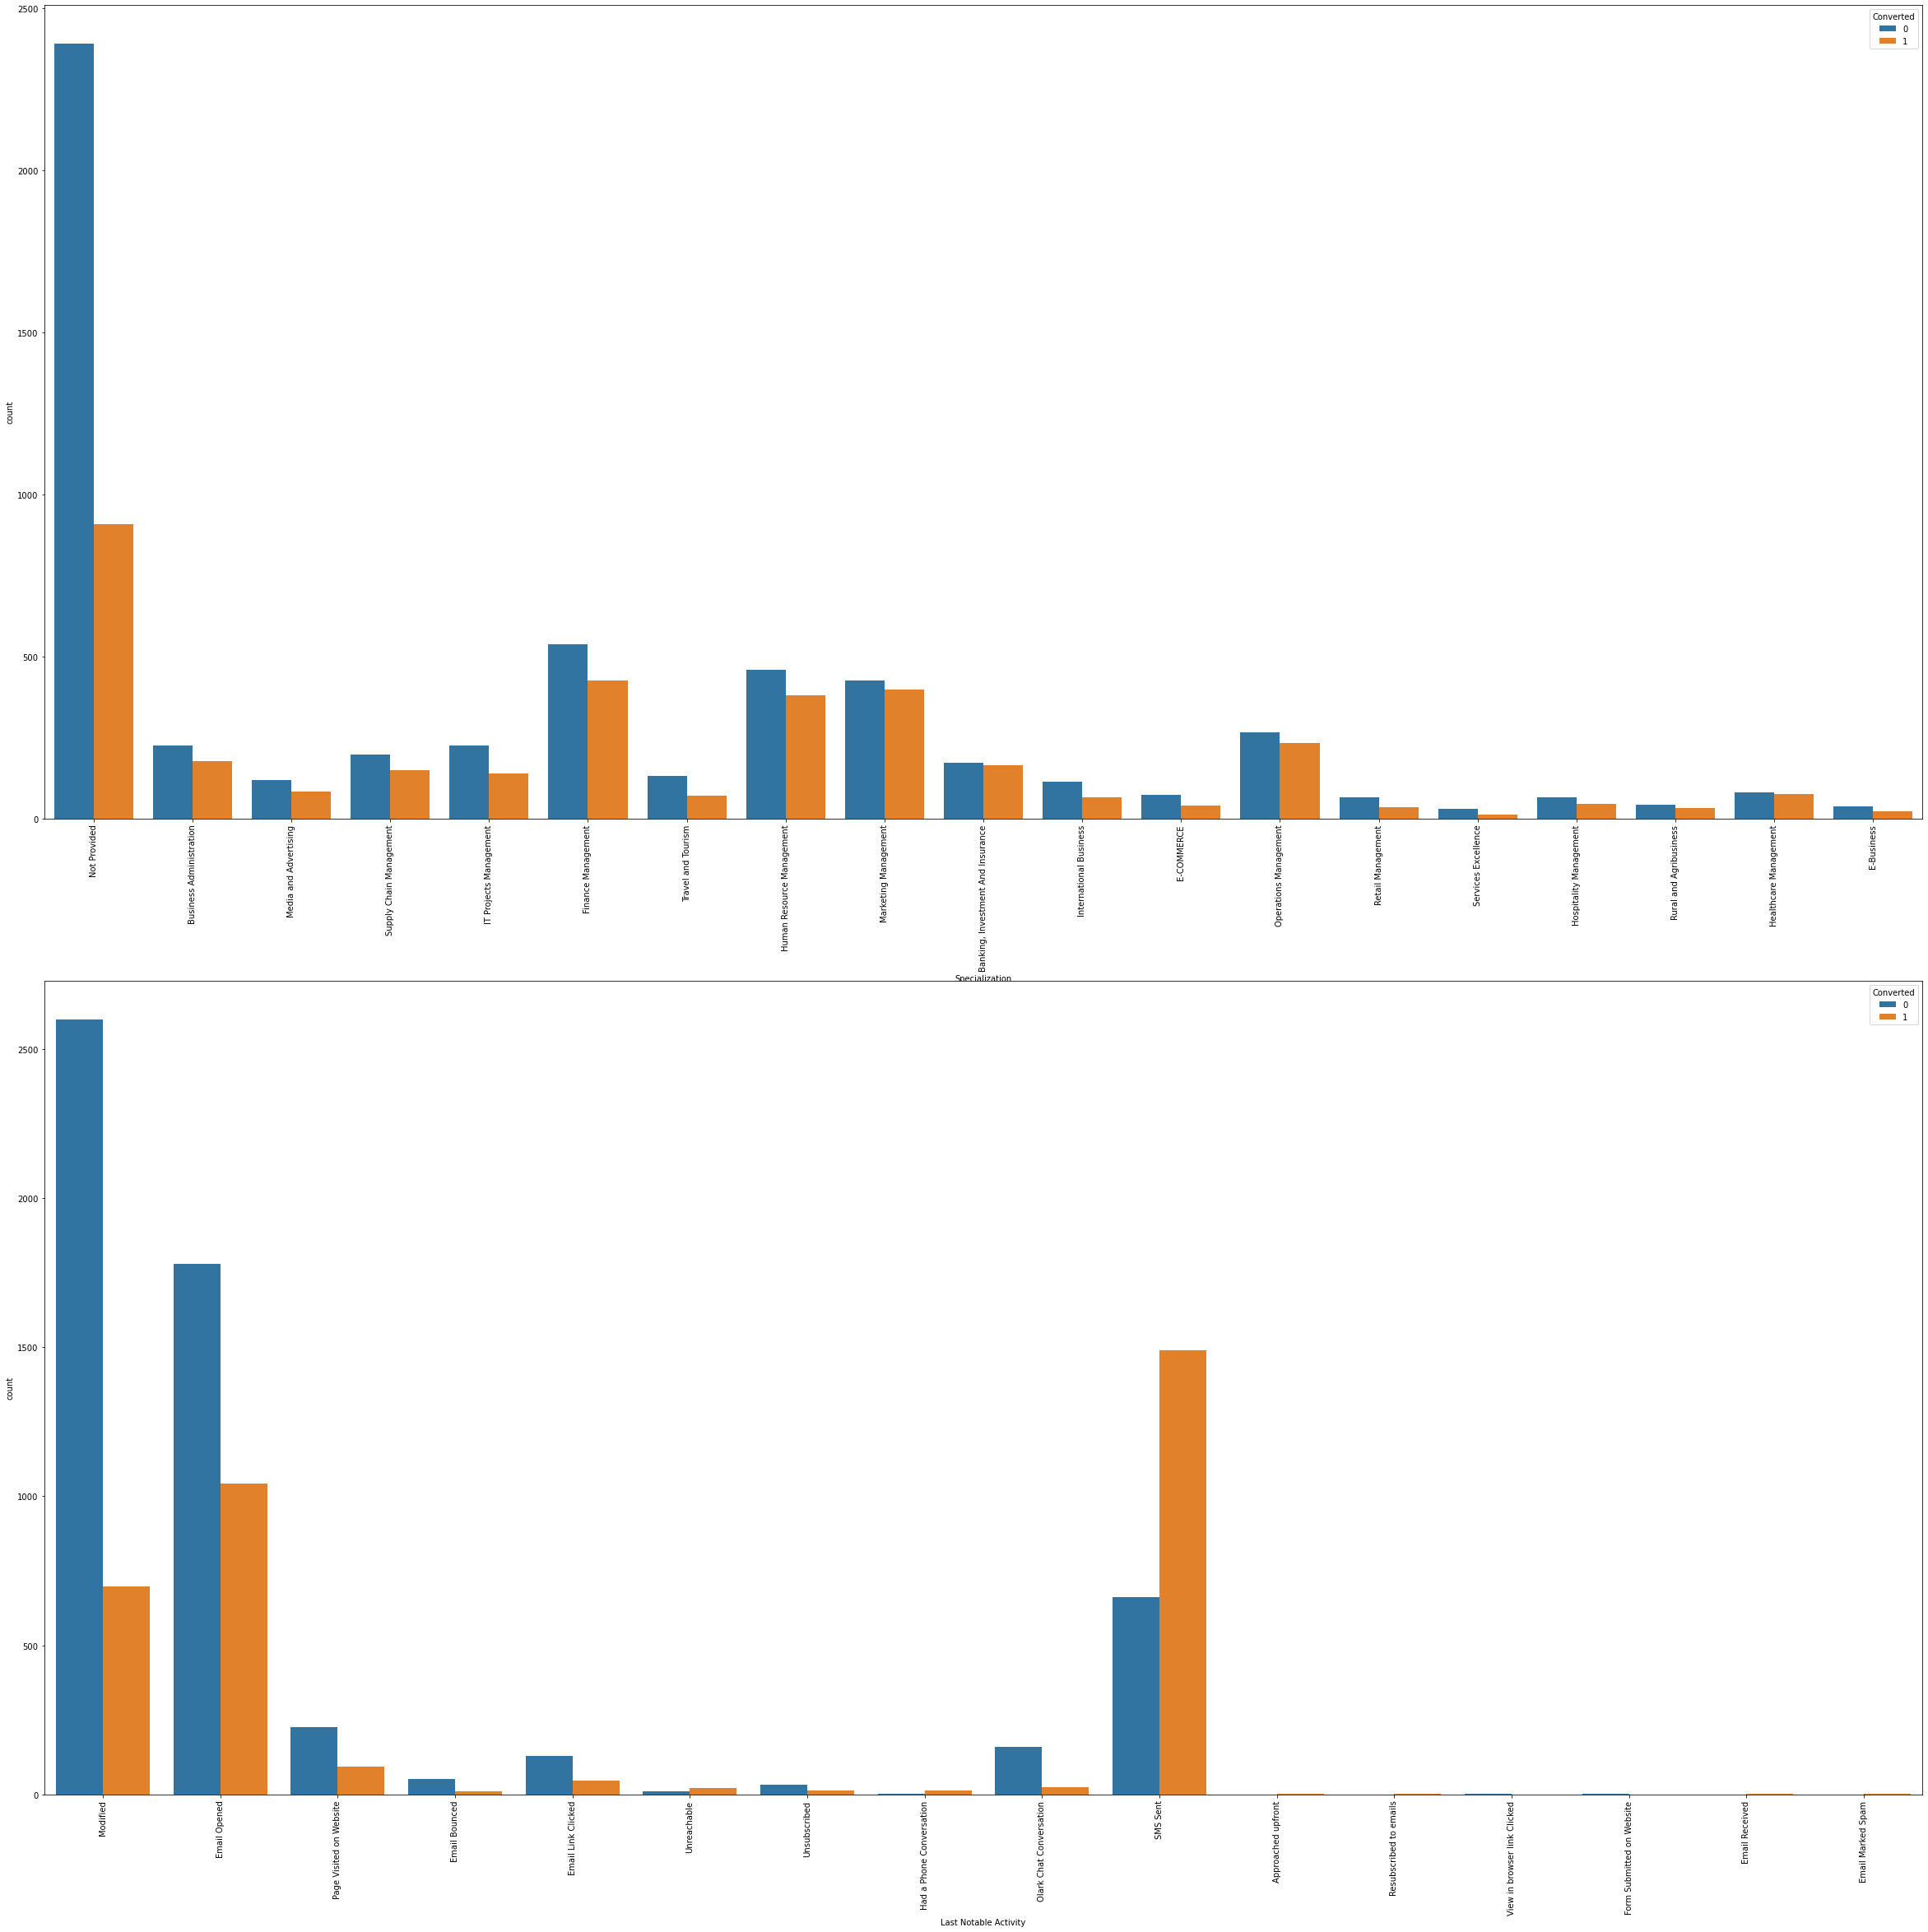

In [45]:
#Bivariate Analysis
plt.figure(figsize=(90, 40))
plt.subplot(2,2,1)
sns.countplot(x = 'Specialization', hue = 'Converted', data = Lead_Data).tick_params(axis='x', rotation = 90)
plt.subplot(2,2,3)
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = Lead_Data).tick_params(axis='x', rotation = 90)
plt.show()

<AxesSubplot:title={'center':'Total Time Spent on Website'}, xlabel='Total Time Spent on Website'>

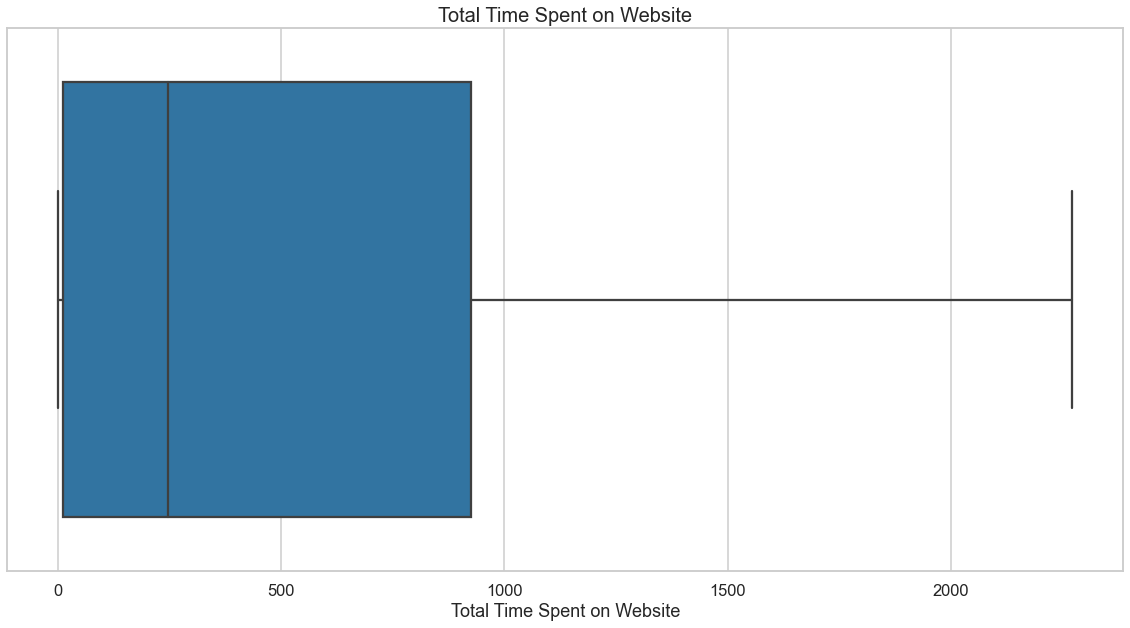

In [46]:
## Boxplot for outliers

plt.figure(figsize=(10,10))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')
plt.title('Total Time Spent on Website',fontsize=20)
sns.boxplot(x=Lead_Data['Total Time Spent on Website'],data=Lead_Data,orient='v',fliersize=15)

### Observations so far
- We can drop - Search , Newspaper Article , X Education Forum, Newspaper, Through Recommendations , Digital Advertising as they have dont have any value in Yes hence it will not impact our analysis
- We also observed when email is sent as last notable activity the count of converted are high
- Almost all the leads are from India
- We also observe if the Lead Origin is Landing Page Submission or API the count is high and more scope of getting lead.

In [47]:
Lead_Data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Total Time Spent on Website', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
# Dropping few more columns as it does not make sense in analysis
Lead_Data.drop(['Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations'], axis=1 , inplace=True)

In [49]:
Lead_Data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Total Time Spent on Website', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

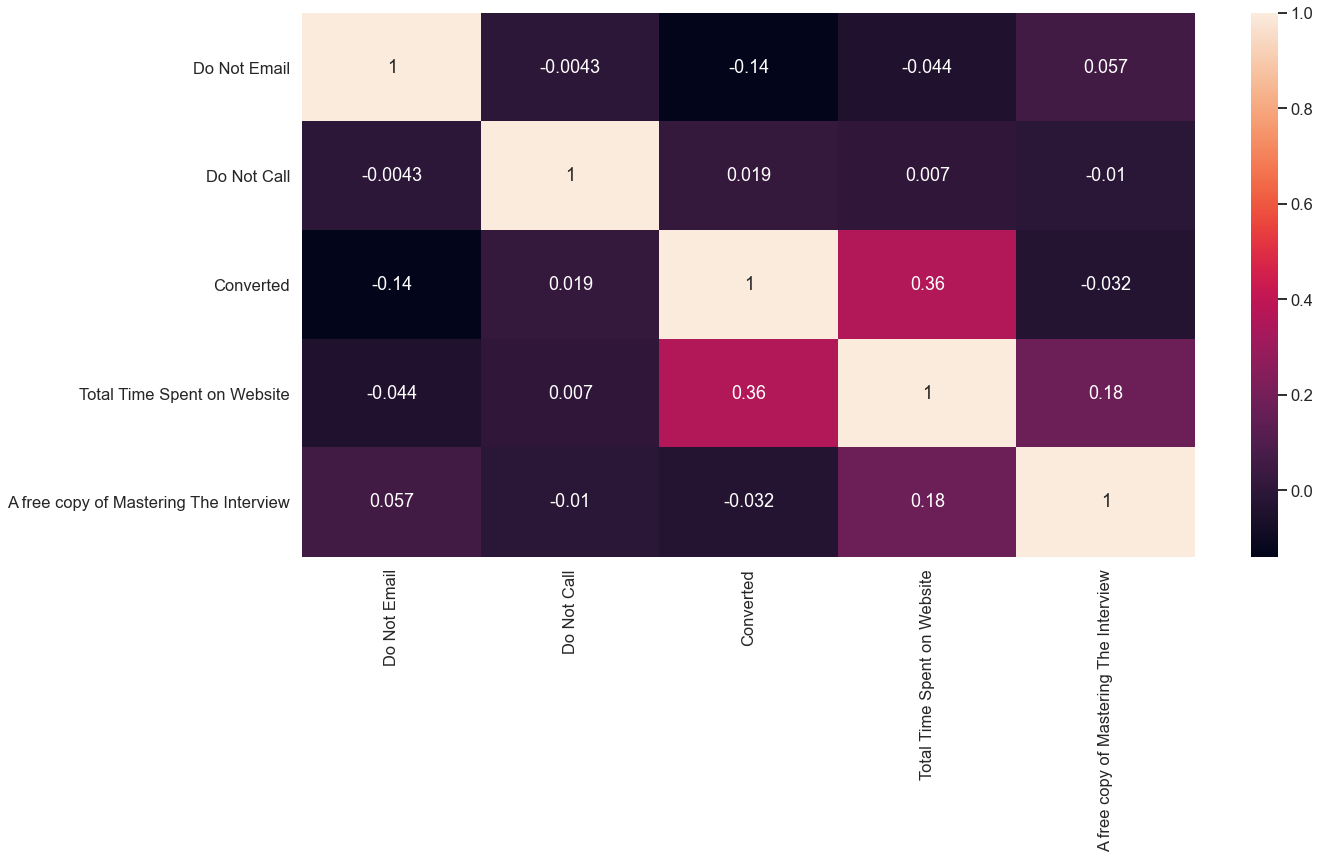

In [50]:
#Multi Variate Analysis
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead_Data.corr(),annot = True)
plt.show()

Lets create dummies variables

In [51]:
#Dummy creation
Lead = pd.get_dummies(Lead_Data[['Lead Origin','Country','Specialization','What is your current occupation','Last Notable Activity','Lead Source']],drop_first=True)
Lead.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_India,Country_Not Provided,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
#Combining dummies with dataset
Hot_Lead = pd.concat([Lead_Data , Lead], axis =1)
Hot_Lead.shape

(9103, 76)

In [53]:
Hot_Lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_India,Country_Not Provided,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,API,Olark Chat,0,0,0,0,Page Visited on Website,Not Provided,Not Provided,Unemployed,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,674,Email Opened,India,Not Provided,Unemployed,0,Email Opened,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,1532,Email Opened,India,Business Administration,Student,1,Email Opened,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,305,Unreachable,India,Media and Advertising,Unemployed,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,1428,Converted to Lead,India,Not Provided,Unemployed,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
Hot_Lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Total Time Spent on Website', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Country_India', 'Country_Not Provided',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Not Provided',
       'Specialization_Operations Management',
     

In [55]:
#Dropping redundent columns after merging dummies
Hot_Lead.drop(['Lead Origin','Country','Specialization','What is your current occupation','Last Notable Activity','Last Activity','Lead Source'],axis=1 , inplace=True)

In [56]:
Hot_Lead.shape

(9103, 69)

In [57]:
col_list=Hot_Lead.columns

In [58]:
col_list

Index(['Do Not Email', 'Do Not Call', 'Converted',
       'Total Time Spent on Website', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Country_India', 'Country_Not Provided',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Not Provided',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specializat

In [59]:
Hot_Lead.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_India,Country_Not Provided,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,674,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1532,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,305,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1428,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 3: Model Building

#### Train and Test Split

In [60]:
# Putting response variable to y
y = Hot_Lead['Converted']

X=Hot_Lead.drop('Converted', axis=1)

In [61]:
## # Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
## Scaling the data

scalar = MinMaxScaler()

X_train[['Total Time Spent on Website']] = scalar.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_India,Country_Not Provided,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
7963,0,0,0.821571,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5521,1,0,0.013316,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1951,0,0,0.661340,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1553,0,0,0.534842,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9170,0,0,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
X_train.describe()

,Do Not Email,Do Not Call,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_India,Country_Not Provided,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
count,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.00000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.0,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.0,6372.0,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000
mean,0.078154,0.000157,0.216685,0.314030,0.536566,0.069052,0.004551,0.708726,0.260044,0.042373,0.005964,0.013183,0.105775,0.01742,0.012869,0.094947,0.039862,0.020559,0.089611,0.022756,0.361268,0.052731,0.011927,0.008004,0.003766,0.040019,0.022128,0.000785,0.298336,0.002197,0.023070,0.599341,0.075330,0.006591,0.018989,0.000314,0.311676,0.000157,0.000157,0.001569,0.359856,0.019931,0.033271,0.0,0.238701,0.003453,0.005022,0.000157,0.276051,0.004708,0.315913,0.000157,0.000157,0.194758,0.125235,0.0,0.0,0.052888,0.012398,0.000314,0.000157,0.015223,0.000471,0.000157,0.000471,0.000157,0.000157,0.000157
std,0.268436,0.012527,0.243258,0.464165,0.498700,0.253563,0.067314,0.454385,0.438693,0.201454,0.077000,0.114065,0.307574,0.13084,0.112717,0.293164,0.195650,0.141913,0.285646,0.149136,0.480406,0.223513,0.108567,0.089112,0.061261,0.196019,0.147112,0.028003,0.457564,0.046826,0.150137,0.490070,0.263943,0.080925,0.136498,0.017715,0.463215,0.012527,0.012527,0.039587,0.479996,0.139774,0.179356,0.0,0.426323,0.058662,0.0

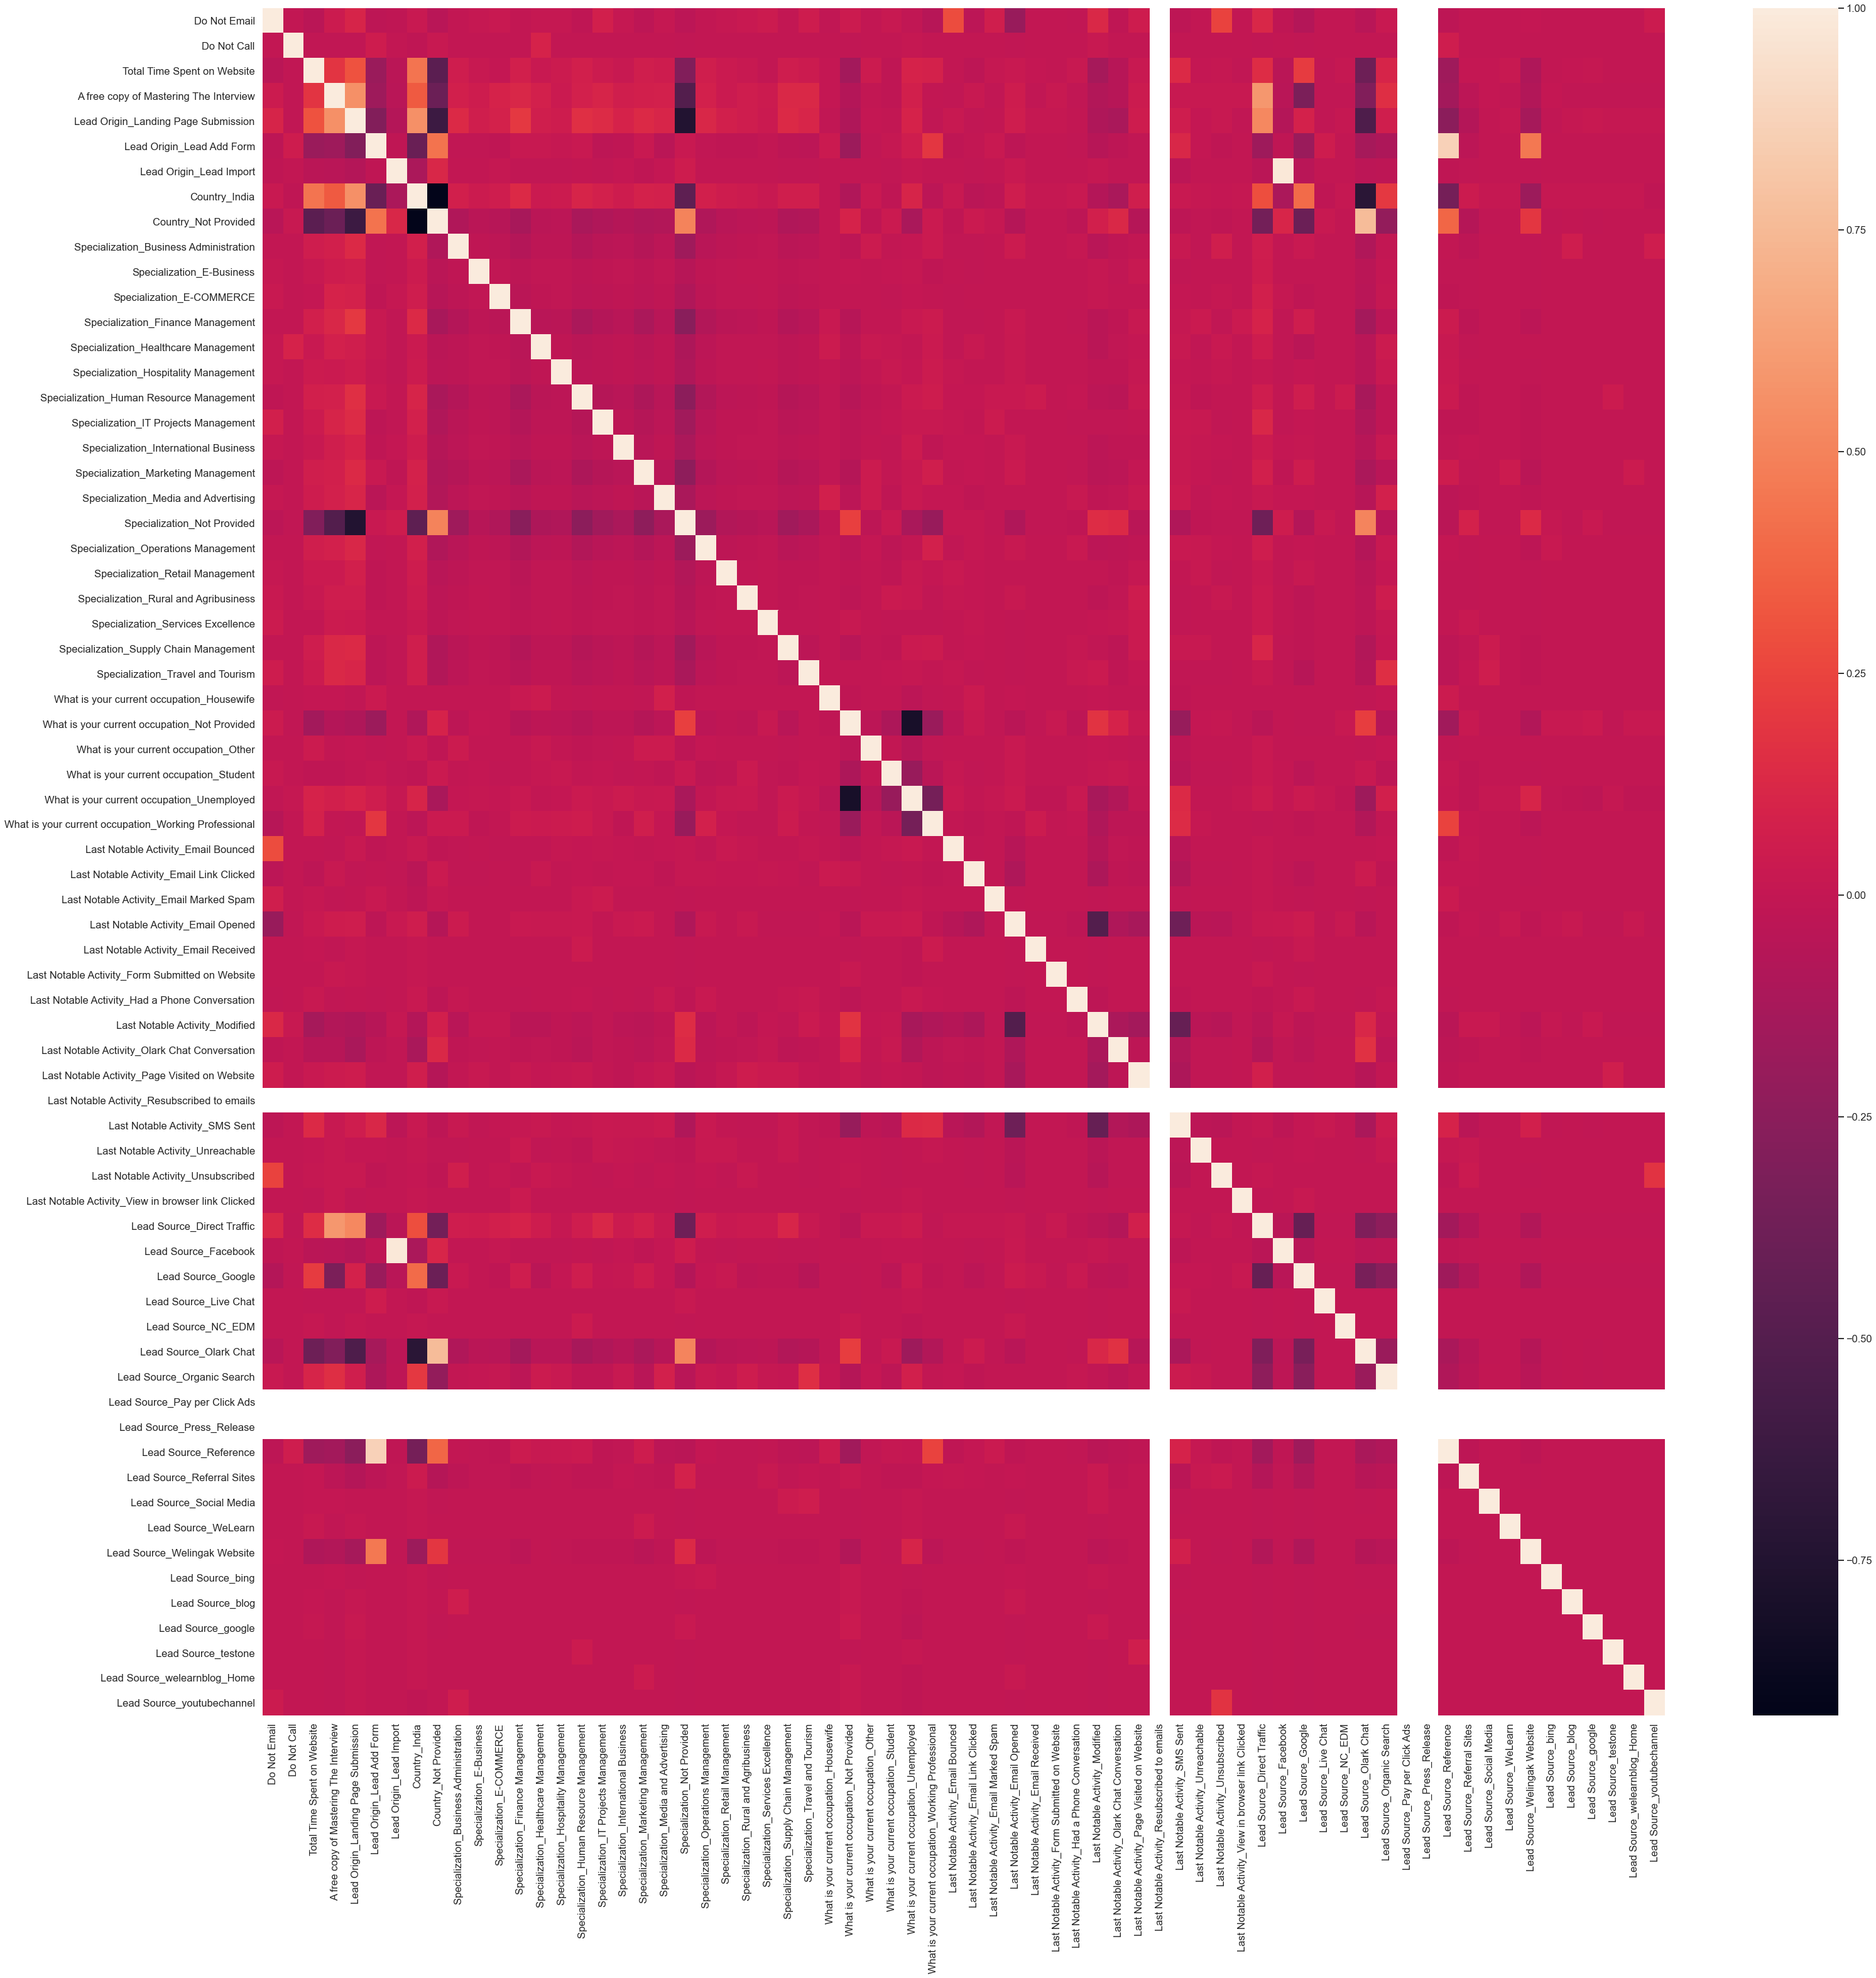

In [64]:
#Multi variate analysis
plt.figure(figsize = (50,50))        # Size of the figure
sns.heatmap(X_train.corr())
plt.show()

In [65]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm= sm.GLM(y_train,X_train_sm ,family= sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.1
Date:                Sun, 12 Jun 2022   Deviance:                       5072.1
Time:                        09:31:42   Pearson chi2:                 6.53e+03
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   24.2988   1.83e+05      0.000      1.000   -3.58e+05    3.58e+05
Do Not Email                                            -1.2689      0.198     -6.404      0.000      -1.657      -0.881
Do Not Call                                             25.5538    5.1e+05   5.01e-05      1.000   -9.99e+05    9.99e+05
Total Time Spent on Website                              4.6755      0.172     27.152      0.000       4.338       5.013
A free copy of Mastering The Interview                   0.0161      0.111      0.146      0.884      -0.201       0.233
Lead Origin_Landing Page Submission                     -0.9944      0.142     -7.013      0.000      -1.272      -0.716
Lead Origin_Lead Add Form                               -0.2836      1.432     -0.198      0.843      -3.090       2.523
Lead Origin_Lead Import                                 24.0002    2.4e+05   9.99e-05      1.000   -4.71e+05    4.71e+05
Country_India                                            0.4536      0.220      2.065      0.039       0.023       0.884
Country_Not Provided                                     1.4901      0.330      4.520      0.000       0.844       2.136
Specialization_Business Administration                  -0.1969      0.249     -0.792      0.429      -0.684       0.291
Specialization_E-Business                               -0.1983      0.476     -0.417      0.677      -1.131       0.734
Specialization_E-COMMERCE                               -0.0994      0.360     -0.276      0.783      -0.805       0.607
Specialization_Finance Management                       -0.0045      0.210     -0.022      0.983      -0.417       0.408
Specialization_Healthcare Management                    -0.1658      0.321     -0.516      0.606      -0.795       0.464
Specialization_Hospitality Management                   -1.1184      0.374     -2.989      0.003      -1.852      -0.385
Specialization_Human Resource Management                -0.2342      0.213     -1.099      0.272      -0.652       0.184
Specialization_IT Projects Management                    0.0497      0.254      0.195      0.845      -0.449       0.548
Specialization_International Business                   -0.2810      0.295     -0.953      0.340      -0.859       0.297
Specialization_Marketing Management                     -0.1294      0.215     -0.601      0.548      -0.551       0.292
Specialization_Media and Advertising                    -0.3935      0.292     -1.345      0.178      -0.967       0.180
Specialization_Not Provided                             -1.2802      0.219     -5.853      0.000      -1.709      -0.852
Specialization_Operations Management                    -0

In [66]:
## Model Building
logreg = LogisticRegression()

In [67]:
#Feature selection top 15
rfe = RFE(logreg, 15)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [68]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False])

In [69]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 51),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Country_India', False, 11),
 ('Country_Not Provided', True, 1),
 ('Specialization_Business Administration', False, 44),
 ('Specialization_E-Business', False, 45),
 ('Specialization_E-COMMERCE', False, 49),
 ('Specialization_Finance Management', False, 33),
 ('Specialization_Healthcare Management', False, 47),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 39),
 ('Specialization_IT Projects Management', False, 27),
 ('Specialization_International Business', False, 35),
 ('Specialization_Marketing Management', False, 48),
 ('Specialization_Media and Advertising', False, 21),
 ('Specialization_Not Provided', True, 1),
 ('Specialization_Operatio

In [70]:
#getting selected feature in col
col = X_train.columns[rfe.support_]

In [71]:
#Model Building
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.7
Date:                Sun, 12 Jun 2022   Deviance:                       5189.5
Time:                        09:31:44   Pearson chi2:                 6.76e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1882      0.127     -9.345      0.000      -1.437      -0.939
Do Not Email                                            -1.3585      0.176     -7.708      0.000      -1.704      -1.013
Total Time Spent on Website                              4.6527      0.169     27.583      0.000       4.322       4.983
Lead Origin_Landing Page Submission                     -1.1055      0.123     -8.981      0.000      -1.347      -0.864
Lead Origin_Lead Add Form                                2.1668      0.230      9.404      0.000       1.715       2.618
Country_Not Provided                                     1.1177      0.120      9.319      0.000       0.883       1.353
Specialization_Hospitality Management                   -0.9150      0.327     -2.798      0.005      -1.556      -0.274
Specialization_Not Provided                             -1.1969      0.125     -9.585      0.000      -1.442      -0.952
What is your current occupation_Housewife               23.2154    3.2e+04      0.001      0.999   -6.26e+04    6.27e+04
What is your current occupation_Not Provided            -1.1068      0.088    -12.635      0.000      -1.279      -0.935
What is your current occupation_Working Professional     2.2671      0.191     11.850      0.000       1.892       2.642
Last Notable Activity_Had a Phone Conversation          24.2226   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
Last Notable Activity_SMS Sent                           1.6662      0.080     20.727      0.000       1.509       1.824
Last Notable Activity_Unreachable                        1.5719      0.555      2.834      0.005       0.485       2.659
Last Notable Activity_Unsubscribed                       1.4180      0.501      2.830      0.005       0.436       2.400
Lead Source_Welingak Website                             3.1290      1.034      3.026      0.002       1.102       5.156
========================================================================================================================
"""

In [72]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Country_Not Provided', 'Specialization_Hospitality Management',
       'Specialization_Not Provided',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Lead Source_Welingak Website'],
      dtype='object')

In [73]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Country_Not Provided,2.56
6,Specialization_Not Provided,2.44
2,Lead Origin_Landing Page Submission,2.22
1,Total Time Spent on Website,2.05
3,Lead Origin_Lead Add Form,1.86
8,What is your current occupation_Not Provided,1.61
11,Last Notable Activity_SMS Sent,1.41
14,Lead Source_Welingak Website,1.34
9,What is your current occupation_Working Profes...,1.21
0,Do Not Email,1.18


In [74]:
X_train[col].columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Country_Not Provided', 'Specialization_Hospitality Management',
       'Specialization_Not Provided',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Lead Source_Welingak Website'],
      dtype='object')

In [124]:
## Dropping Last Notable Activity_Had a Phone Conversation having high P value

col = ['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Country_Not Provided', 'Specialization_Hospitality Management',
       'Specialization_Not Provided',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Lead Source_Welingak Website']

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.7
Date:                Sun, 12 Jun 2022   Deviance:                       5209.3
Time:                        09:33:52   Pearson chi2:                 6.77e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1616      0.127     -9.178      0.000      -1.410      -0.914
Do Not Email                                            -1.3634      0.176     -7.742      0.000      -1.708      -1.018
Total Time Spent on Website                              4.6338      0.168     27.556      0.000       4.304       4.963
Lead Origin_Landing Page Submission                     -1.1133      0.123     -9.077      0.000      -1.354      -0.873
Lead Origin_Lead Add Form                                2.1607      0.230      9.379      0.000       1.709       2.612
Country_Not Provided                                     1.1058      0.120      9.239      0.000       0.871       1.340
Specialization_Hospitality Management                   -0.9219      0.327     -2.821      0.005      -1.562      -0.281
Specialization_Not Provided                             -1.2082      0.125     -9.701      0.000      -1.452      -0.964
What is your current occupation_Housewife               21.2017   1.18e+04      0.002      0.999    -2.3e+04    2.31e+04
What is your current occupation_Not Provided            -1.1129      0.087    -12.719      0.000      -1.284      -0.941
What is your current occupation_Working Professional     2.2632      0.191     11.847      0.000       1.889       2.638
Last Notable Activity_SMS Sent                           1.6563      0.080     20.634      0.000       1.499       1.814
Last Notable Activity_Unreachable                        1.5599      0.555      2.812      0.005       0.472       2.647
Last Notable Activity_Unsubscribed                       1.4135      0.501      2.822      0.005       0.432       2.395
Lead Source_Welingak Website                             3.1342      1.034      3.031      0.002       1.107       5.161
========================================================================================================================
"""

In [125]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Country_Not Provided,2.56
6,Specialization_Not Provided,2.44
2,Lead Origin_Landing Page Submission,2.22
1,Total Time Spent on Website,2.05
3,Lead Origin_Lead Add Form,1.86
8,What is your current occupation_Not Provided,1.61
10,Last Notable Activity_SMS Sent,1.41
13,Lead Source_Welingak Website,1.34
9,What is your current occupation_Working Profes...,1.21
0,Do Not Email,1.18


In [126]:
## Dropping 'What is your current occupation_Housewife' having high p value

col = ['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Country_Not Provided', 'Specialization_Hospitality Management',
       'Specialization_Not Provided',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Lead Source_Welingak Website']

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.3
Date:                Sun, 12 Jun 2022   Deviance:                       5214.6
Time:                        09:35:27   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1558      0.126     -9.143      0.000      -1.404      -0.908
Do Not Email                                            -1.3659      0.176     -7.756      0.000      -1.711      -1.021
Total Time Spent on Website                              4.6341      0.168     27.570      0.000       4.305       4.964
Lead Origin_Landing Page Submission                     -1.1148      0.123     -9.099      0.000      -1.355      -0.875
Lead Origin_Lead Add Form                                2.1758      0.230      9.459      0.000       1.725       2.627
Country_Not Provided                                     1.1031      0.120      9.226      0.000       0.869       1.337
Specialization_Hospitality Management                   -0.9263      0.327     -2.834      0.005      -1.567      -0.286
Specialization_Not Provided                             -1.2117      0.124     -9.733      0.000      -1.456      -0.968
What is your current occupation_Not Provided            -1.1147      0.087    -12.743      0.000      -1.286      -0.943
What is your current occupation_Working Professional     2.2596      0.191     11.827      0.000       1.885       2.634
Last Notable Activity_SMS Sent                           1.6533      0.080     20.601      0.000       1.496       1.811
Last Notable Activity_Unreachable                        1.5568      0.555      2.805      0.005       0.469       2.645
Last Notable Activity_Unsubscribed                       1.4133      0.501      2.821      0.005       0.431       2.395
Lead Source_Welingak Website                             3.1205      1.034      3.018      0.003       1.094       5.147
========================================================================================================================
"""

In [127]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Country_Not Provided,2.56
6,Specialization_Not Provided,2.44
2,Lead Origin_Landing Page Submission,2.22
1,Total Time Spent on Website,2.05
3,Lead Origin_Lead Add Form,1.86
7,What is your current occupation_Not Provided,1.61
9,Last Notable Activity_SMS Sent,1.41
12,Lead Source_Welingak Website,1.34
8,What is your current occupation_Working Profes...,1.21
0,Do Not Email,1.18


In [128]:
## Dropping  Last Notable Activity_Unsubscribed, having high p value

col = ['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Country_Not Provided', 'Specialization_Hospitality Management',
       'Specialization_Not Provided',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable', 'Lead Source_Welingak Website']

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.8
Date:                Sun, 12 Jun 2022   Deviance:                       5221.6
Time:                        09:36:50   Pearson chi2:                 6.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1495      0.126     -9.098      0.000      -1.397      -0.902
Do Not Email                                            -1.2329      0.165     -7.468      0.000      -1.556      -0.909
Total Time Spent on Website                              4.6347      0.168     27.603      0.000       4.306       4.964
Lead Origin_Landing Page Submission                     -1.1193      0.123     -9.134      0.000      -1.359      -0.879
Lead Origin_Lead Add Form                                2.1633      0.230      9.424      0.000       1.713       2.613
Country_Not Provided                                     1.1000      0.119      9.208      0.000       0.866       1.334
Specialization_Hospitality Management                   -0.9037      0.325     -2.783      0.005      -1.540      -0.267
Specialization_Not Provided                             -1.2132      0.124     -9.751      0.000      -1.457      -0.969
What is your current occupation_Not Provided            -1.1140      0.087    -12.741      0.000      -1.285      -0.943
What is your current occupation_Working Professional     2.2669      0.191     11.865      0.000       1.892       2.641
Last Notable Activity_SMS Sent                           1.6419      0.080     20.523      0.000       1.485       1.799
Last Notable Activity_Unreachable                        1.5518      0.555      2.798      0.005       0.465       2.639
Lead Source_Welingak Website                             3.1077      1.033      3.008      0.003       1.082       5.133
========================================================================================================================
"""

In [129]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Country_Not Provided,2.56
6,Specialization_Not Provided,2.44
2,Lead Origin_Landing Page Submission,2.22
1,Total Time Spent on Website,2.04
3,Lead Origin_Lead Add Form,1.86
7,What is your current occupation_Not Provided,1.61
9,Last Notable Activity_SMS Sent,1.40
11,Lead Source_Welingak Website,1.34
8,What is your current occupation_Working Profes...,1.21
0,Do Not Email,1.11


In [130]:
## Dropping  Specialization_Hospitality Management, having high p value

col = ['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Country_Not Provided', 
       'Specialization_Not Provided',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable', 'Lead Source_Welingak Website']

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.7
Date:                Sun, 12 Jun 2022   Deviance:                       5229.3
Time:                        09:37:42   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1656      0.126     -9.232      0.000      -1.413      -0.918
Do Not Email                                            -1.2415      0.165     -7.520      0.000      -1.565      -0.918
Total Time Spent on Website                              4.6196      0.168     27.556      0.000       4.291       4.948
Lead Origin_Landing Page Submission                     -1.1103      0.122     -9.070      0.000      -1.350      -0.870
Lead Origin_Lead Add Form                                2.1395      0.229      9.342      0.000       1.691       2.588
Country_Not Provided                                     1.0962      0.119      9.184      0.000       0.862       1.330
Specialization_Not Provided                             -1.1911      0.124     -9.602      0.000      -1.434      -0.948
What is your current occupation_Not Provided            -1.1128      0.087    -12.736      0.000      -1.284      -0.942
What is your current occupation_Working Professional     2.2386      0.190     11.769      0.000       1.866       2.611
Last Notable Activity_SMS Sent                           1.6396      0.080     20.515      0.000       1.483       1.796
Last Notable Activity_Unreachable                        1.5604      0.554      2.817      0.005       0.475       2.646
Lead Source_Welingak Website                             3.1327      1.033      3.032      0.002       1.108       5.158
========================================================================================================================
"""

In [131]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Country_Not Provided,2.56
5,Specialization_Not Provided,2.44
2,Lead Origin_Landing Page Submission,2.21
1,Total Time Spent on Website,2.04
3,Lead Origin_Lead Add Form,1.86
6,What is your current occupation_Not Provided,1.61
8,Last Notable Activity_SMS Sent,1.40
10,Lead Source_Welingak Website,1.34
7,What is your current occupation_Working Profes...,1.21
0,Do Not Email,1.11


In [132]:
## Dropping  'Last Notable Activity_Unreachable',, having high p value

col = ['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Country_Not Provided', 
       'Specialization_Not Provided',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Lead Source_Welingak Website']

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.5
Date:                Sun, 12 Jun 2022   Deviance:                       5236.9
Time:                        09:38:31   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1470      0.126     -9.111      0.000      -1.394      -0.900
Do Not Email                                            -1.2450      0.165     -7.545      0.000      -1.568      -0.922
Total Time Spent on Website                              4.6072      0.167     27.534      0.000       4.279       4.935
Lead Origin_Landing Page Submission                     -1.1171      0.122     -9.134      0.000      -1.357      -0.877
Lead Origin_Lead Add Form                                2.1394      0.229      9.345      0.000       1.691       2.588
Country_Not Provided                                     1.0872      0.119      9.123      0.000       0.854       1.321
Specialization_Not Provided                             -1.1977      0.124     -9.662      0.000      -1.441      -0.955
What is your current occupation_Not Provided            -1.1096      0.087    -12.713      0.000      -1.281      -0.938
What is your current occupation_Working Professional     2.2393      0.190     11.785      0.000       1.867       2.612
Last Notable Activity_SMS Sent                           1.6314      0.080     20.443      0.000       1.475       1.788
Lead Source_Welingak Website                             3.1317      1.033      3.031      0.002       1.107       5.157
========================================================================================================================
"""

In [133]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Country_Not Provided,2.56
5,Specialization_Not Provided,2.44
2,Lead Origin_Landing Page Submission,2.21
1,Total Time Spent on Website,2.04
3,Lead Origin_Lead Add Form,1.86
6,What is your current occupation_Not Provided,1.61
8,Last Notable Activity_SMS Sent,1.40
9,Lead Source_Welingak Website,1.34
7,What is your current occupation_Working Profes...,1.21
0,Do Not Email,1.11


### Observation so far
- We can stop here as we can see no large p values as well as VIF is acceptable.
- Technically speaking we can say that there is no sign of `multi collinearity` in the model now and no `insignificance` in the variables selected.



**We can now proceed further with our Prediction on the Train Set**

### Model Prediction

In [134]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7963    0.977254
5521    0.010381
1951    0.869882
1553    0.549830
9170    0.221400
5097    0.085717
8953    0.688606
308     0.401024
5520    0.105132
1045    0.166904
dtype: float64

In [135]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97725373, 0.01038064, 0.86988244, 0.5498304 , 0.22140009,
       0.08571723, 0.68860643, 0.40102364, 0.10513195, 0.16690357])

In [136]:
#Creating dataframe
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID
0,1,0.977254,7963
1,0,0.010381,5521
2,1,0.869882,1951
3,1,0.549830,1553
4,0,0.221400,9170


In [137]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted
0,1,0.977254,7963,1
1,0,0.010381,5521,0
2,1,0.869882,1951,1
3,1,0.549830,1553,1
4,0,0.221400,9170,0


In [138]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8137162586315129


<font color= green>That's around 81% accuracy </font>

In [139]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3484,  437],
       [ 750, 1701]], dtype=int64)

In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6940024479804161

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.8885488395817394

In [143]:
# Calculate false postive rate - predicting converted when lead does not have converted to lead
print(FP/ float(TN+FP))

0.11145116041826064


In [144]:
# positive predictive value 
print (TP / float(TP+FP))

0.7956033676333022


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8228625413320737


### Plotting ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [146]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

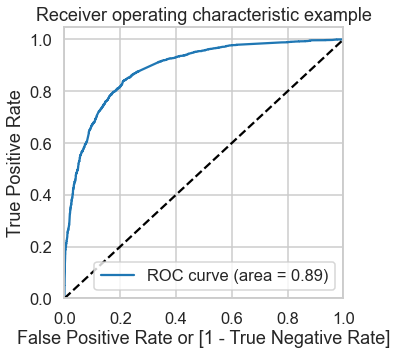

In [148]:
#ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Points to be concluded from above roc curve -
- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
- The area under the curve is 89% of the total area.

#### Finding the Optimal Cut Off Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [149]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.977254,7963,1,1,1,1,1,1,1,1,1,1,1
1,0,0.010381,5521,0,1,0,0,0,0,0,0,0,0,0
2,1,0.869882,1951,1,1,1,1,1,1,1,1,1,1,0
3,1,0.549830,1553,1,1,1,1,1,1,1,0,0,0,0
4,0,0.221400,9170,0,1,1,1,0,0,0,0,0,0,0


In [150]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384652  1.000000  0.000000
0.1   0.1  0.629473  0.975520  0.413160
0.2   0.2  0.751883  0.918401  0.647794
0.3   0.3  0.805242  0.845777  0.779903
0.4   0.4  0.815599  0.784986  0.834736
0.5   0.5  0.813716  0.694002  0.888549
0.6   0.6  0.798650  0.601795  0.921704
0.7   0.7  0.785468  0.524684  0.948483
0.8   0.8  0.758945  0.425949  0.967100
0.9   0.9  0.709981  0.268462  0.985973


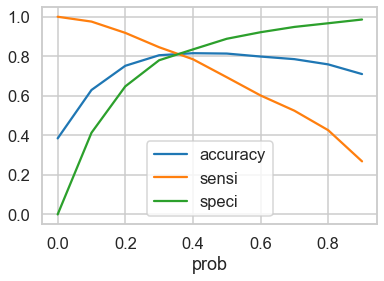

In [151]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color= green>___From the graph it is visible that the optimal cut off is at 0.38.___</font>

In [152]:
#Final prediction based on cut off value
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.977254,7963,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.010381,5521,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.869882,1951,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.549830,1553,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.221400,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8127746390458255

In [154]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3222,  699],
       [ 494, 1957]], dtype=int64)

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7984496124031008

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.8217291507268554

In [158]:
# Calculate false postive rate - predicting converted when customer does not have converted to lead
print(FP/ float(TN+FP))

0.1782708492731446


In [159]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7368222891566265


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8683005655803933


### Precision and Recall Tradeoff

In [160]:
# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion_pr

array([[3222,  699],
       [ 494, 1957]], dtype=int64)

In [161]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    # Printing Pecision score
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       # Printing Recall score

Precision 0.7368222891566265
Recall 0.7984496124031008


In [162]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

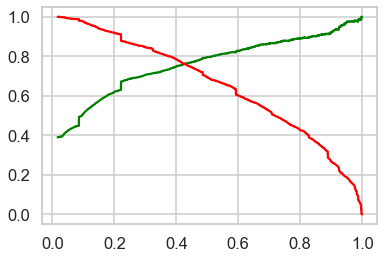

In [163]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [164]:
#Prediction based on the value got from precision and recall
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.977254,7963,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.010381,5521,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.869882,1951,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.549830,1553,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.221400,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8157564344005022

In [166]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3297,  624],
       [ 550, 1901]], dtype=int64)

In [167]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7756017951856385

In [169]:
# Let us calculate specificity
TN / float(TN+FP)

0.8408569242540168

In [170]:
# Calculate false postive rate - predicting converted when customer does not have converted to lead
print(FP/ float(TN+FP))

0.15914307574598316


In [171]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7528712871287129


In [172]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8570314530803224


In [219]:
confusion_pr1=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print('Precision',confusion_pr1[1,1]/(confusion_pr1[0,1]+confusion_pr1[1,1]))    # Printing Pecision score
print('Recall',confusion_pr1[1,1]/(confusion_pr1[1,0]+confusion_pr1[1,1]))       # Printing Recall score

Precision 0.7528712871287129
Recall 0.7756017951856385


## Step 4: Model Evaluation and Prediction on Test Set

In [173]:
# Scaling numeric values
X_test[['Total Time Spent on Website']] = scalar.transform(X_test[['Total Time Spent on Website']])

In [174]:
col=['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Country_Not Provided', 
       'Specialization_Not Provided',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Lead Source_Welingak Website']
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Country_Not Provided,Specialization_Not Provided,What is your current occupation_Not Provided,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Lead Source_Welingak Website
3497,0,0.000000,0,1,1,0,0,0,0,0
4044,0,0.000000,0,0,1,0,0,0,1,0
7200,0,0.066578,0,0,0,1,0,0,0,0
1183,0,0.000000,0,0,1,1,0,0,0,0
8216,0,0.015535,0,0,0,1,1,0,0,0


In [175]:
X_test_sm = sm.add_constant(X_test)

In [176]:
#Test Prediction
y_test_pred = res.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
3497,0.888899
4044,0.828010
7200,0.115272
1183,0.221400
8216,0.032840


In [177]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead ID,0
0,1,3497,0.888899
1,1,4044,0.828010
2,0,7200,0.115272
3,0,1183,0.221400
4,0,8216,0.032840


In [178]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Lead ID,Converted,Converted_Prob
0,3497,1,0.888899
1,4044,1,0.828010
2,7200,0,0.115272
3,1183,0,0.221400
4,8216,0,0.032840


In [215]:
#Prediction based on cutoff
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)

y_pred_final.head()

,Lead ID,Converted,Converted_Prob,final_predicted,Lead Score
0,3497,1,0.888899,1,89
1,4044,1,0.828010,1,83
2,7200,0,0.115272,0,12
3,1183,0,0.221400,0,22
4,8216,0,0.032840,0,3


## Step 5: Optimization and Accuracy Score

In [193]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8092273892347126

In [194]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1452,  278],
       [ 243,  758]], dtype=int64)

In [195]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [196]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7572427572427572

In [197]:
# Let us calculate specificity
TN / float(TN+FP)

0.8393063583815029

In [198]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7956033676333022

In [199]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6940024479804161

#### Precision and Recall Tradeoff

In [202]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score in predicting test dataset:',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))   # Printing the precision score

print('Recall score in predicting test dataset:',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))      # Printing the recall score

Precision score in predicting test dataset: 0.7316602316602316
Recall score in predicting test dataset: 0.7572427572427572


## Lead Score

In [203]:
y_pred_final.head()

,Lead ID,Converted,Converted_Prob,final_predicted,final_predicted1
0,3497,1,0.888899,1,1
1,4044,1,0.828010,1,1
2,7200,0,0.115272,0,0
3,1183,0,0.221400,0,0
4,8216,0,0.032840,0,0


In [220]:
# Creating new column lead score


y_pred_final['Lead Score']=y_pred_final['Converted_Prob'].apply(lambda x:round(x*100))

y_pred_final.head(10)

,Lead ID,Converted,Converted_Prob,final_predicted,Lead Score
0,3497,1,0.888899,1,89
1,4044,1,0.828010,1,83
2,7200,0,0.115272,0,12
3,1183,0,0.221400,0,22
4,8216,0,0.032840,0,3
5,8746,1,0.221400,0,22
6,9047,0,0.058941,0,6
7,6526,1,0.798730,1,80
8,7694,0,0.085717,0,9
9,8184,1,0.902206,1,90


In [218]:
X_test.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Country_Not Provided', 'Specialization_Not Provided',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Lead Source_Welingak Website'],
      dtype='object')

## Step 6: Conclusion

We can draw below conclusion from the analysis and calculations we perform in our assignment on the Data set of `X Education Company`

- We have created a column named `Lead Score` hence model could be run on the production data and then follow the Lead Score column. Higher the score , higher the chances of getting it converted to **Hot Lead**
- The optimal cut off we found is `41%` 
- With this cutoff we are getting `81.5%` accuracy on train data and `80.9%` accuracy on Test data which looks good.
- Also we can see the Precision and Recall we got are as follows:
     - Train Data-  Precision is **75%** ,Recall is  **77%**
     - Test Data-  Precision is **73%**   ,Recall is **76%**
- The Accuracy, Precision and Recall score we got from test set in aceptable range.
- We have high recall score than precision score which we were exactly looking for.
- In business terms, this model has an ability to adjust with the company’s requirements in coming future.
- This concludes that the model is in stable state.
- Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are 
    - `Total Time Spent on Website`
    - `Lead Source_Welingak Website`
    - `What is your current occupation_Working Professional`
    - `Lead Origin_Lead Add Form`
    - `Last Notable Activity_SMS Sent`

### Thank You

**The End**